# Project 4 - Predict West Nile Virus

## 1. Data Cleaning of Test, Train, Spary Datasets

In [1]:
# # # Install calmap if required
# !pip install calmap

In [2]:
# imports:

import pandas as pd
import numpy as np
import calmap

### Read in datasets

In [3]:
# read in test, train, spray csv
train = pd.read_csv ('../assets/train.csv')
test = pd.read_csv ('../assets/test.csv')
spray = pd.read_csv ('../assets/spray.csv')


# replace spaces in column names and convert all columns to lowercase:
train.columns = [x.lower().replace(' ','_') for x in train.columns]
test.columns = [x.lower().replace(' ','_') for x in test.columns]
spray.columns = [x.lower().replace(' ','_') for x in spray.columns]

## Train & Test data

In [4]:
#check train's no. of columns and rows
train.shape

(10506, 12)

In [5]:
#check test's no. of columns and rows
test.shape

(116293, 11)

In [6]:
#check train dataset
train.head(4)

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0


In [7]:
#check for data type of all columns in train; will change some of the datatypes
#appears to have no null values at first glance
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    10506 non-null  object 
 1   address                 10506 non-null  object 
 2   species                 10506 non-null  object 
 3   block                   10506 non-null  int64  
 4   street                  10506 non-null  object 
 5   trap                    10506 non-null  object 
 6   addressnumberandstreet  10506 non-null  object 
 7   latitude                10506 non-null  float64
 8   longitude               10506 non-null  float64
 9   addressaccuracy         10506 non-null  int64  
 10  nummosquitos            10506 non-null  int64  
 11  wnvpresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [8]:
#summary statistics of train
train.describe()

,block,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [9]:
#checking duplicates. The dups were due to multiple entry of trap per day and lat long 
#because max num of mosquito can be recorded per entry is 50
sum(train.duplicated())

813

In [10]:
#no duplicates in test
sum(test.duplicated())

0

In [11]:
#groupby other columns besides num of mosquitos
#and then add up number of mosquitos to remove duplicates

train = train.groupby(['date',
                       'address',
                       'species',
                       'block',
                       'street',
                       'trap',
                       'addressnumberandstreet',
                       'latitude',
                       'longitude',
                       'addressaccuracy',
                       'wnvpresent']).agg({'nummosquitos':np.sum}).reset_index()
                         

In [12]:
#check for duplicates again after grouping and summing the number of mosquito
print(sum(train.duplicated()))
print(train.shape)

0
(8610, 12)


In [13]:
train.date = pd.to_datetime(train.date, format="%Y-%m-%d")
test.date = pd.to_datetime(test.date, format="%Y-%m-%d")

#separate the date column in test and train data to 'year', 'month', and 'day' columns
train[['year','month','day']] = train.date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
test[['year','month','day']] = test.date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))


In [14]:
#check if year month day columns are added in train
train.head(1)

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,wnvpresent,nummosquitos,year,month,day
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,0,1,2007,05,29


In [15]:
#check if year month day columns are added in test
test.head(1)

,id,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,year,month,day
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,06,11


### Drop columns 

In [16]:
#dropping all address related columns because we have longitude and latitude columns already
#get rid of address, street, block, addressnumberandstreet, addressaccuracy columns in both train and test

train.drop(columns= ['address', 'street', 'block', 'addressnumberandstreet', 'addressaccuracy'], inplace=True)
test.drop(columns= ['address', 'street', 'block', 'addressnumberandstreet', 'addressaccuracy'], inplace=True)

In [17]:
#all columns above are dropped in train
train.head(4)

,date,species,trap,latitude,longitude,wnvpresent,nummosquitos,year,month,day
0,2007-05-29,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,0,1,2007,05,29
1,2007-05-29,CULEX RESTUANS,T048,41.867108,-87.654224,0,2,2007,05,29
2,2007-05-29,CULEX RESTUANS,T091,41.862292,-87.648860,0,1,2007,05,29
3,2007-05-29,CULEX RESTUANS,T049,41.896282,-87.655232,0,1,2007,05,29


In [18]:
#all columns above are dropped in test
test.head(4)

,id,date,species,trap,latitude,longitude,year,month,day
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,2008,06,11
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,2008,06,11
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991,2008,06,11
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991,2008,06,11


In [19]:
#no null values in both train and test sets
display(train.isnull().sum(), test.isnull().sum())

date            0
species         0
trap            0
latitude        0
longitude       0
wnvpresent      0
nummosquitos    0
year            0
month           0
day             0
dtype: int64

id           0
date         0
species      0
trap         0
latitude     0
longitude    0
year         0
month        0
day          0
dtype: int64

In [20]:
# check total nummosquitos and wnvpresent
print('total num of mosquitos:', train['nummosquitos'].sum())
print('')
print('unique values of wnvpresent:', train['wnvpresent'].unique())
print('')
print('value count of wnvpresent:')
print(train['wnvpresent'].value_counts())

total num of mosquitos: 135039

unique values of wnvpresent: [0 1]

value count of wnvpresent:
0    8153
1     457
Name: wnvpresent, dtype: int64


In [21]:
#show both train and test dataframes info

print('Train shape:', train.shape)
print('Test shape:', test.shape)
print('')
print('All train columns:', train.columns)
print('')
print('All test columns:', test.columns)

Train shape: (8610, 10)
Test shape: (116293, 9)

All train columns: Index(['date', 'species', 'trap', 'latitude', 'longitude', 'wnvpresent',
       'nummosquitos', 'year', 'month', 'day'],
      dtype='object')

All test columns: Index(['id', 'date', 'species', 'trap', 'latitude', 'longitude', 'year',
       'month', 'day'],
      dtype='object')


In [22]:
#export both cleaned train and test datasets
train.to_csv('../assets/train_cleaned.csv', index=False)
test.to_csv('../assets/test_cleaned.csv', index=False)

## Spray Data

In [23]:
#check spray dataframe
spray.head(4)

,date,time,latitude,longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158


In [24]:
#check spray's no. of columns and rows
spray.shape

(14835, 4)

In [25]:
spray.date = pd.to_datetime(spray.date, format="%Y-%m-%d")

#separate the date column in spray data to 'year', 'month', and 'day' columns
spray[['year','month','day']] = spray.date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))


In [26]:
#check if year month day columns are added
spray.head(1)

,date,time,latitude,longitude,year,month,day
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011,08,29


In [27]:
#total sprays made (counted by days)
days = spray.date.values
len(days)

14835

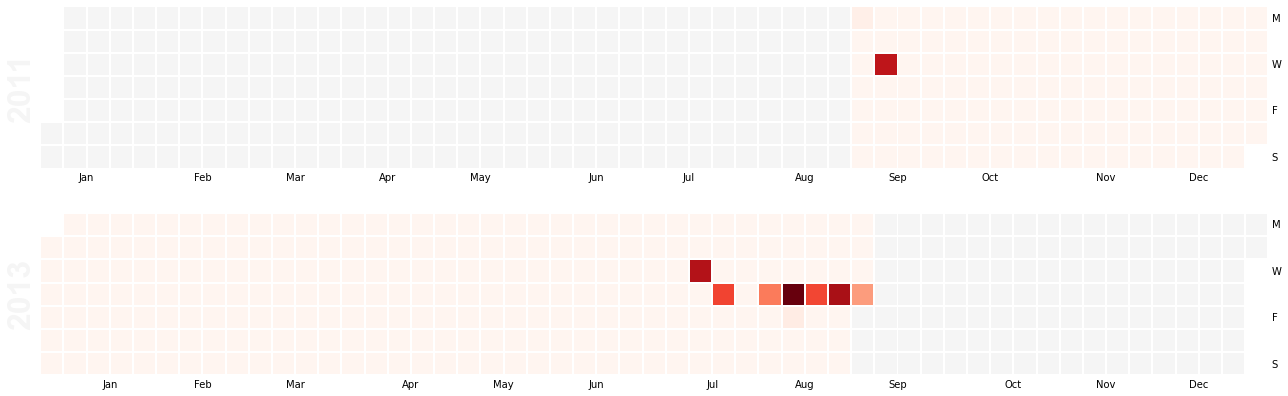

In [28]:
#In which dates the spray was applied
#Plotting a calendarplot to show frequency
#Calendar shows very limited days for sprays

days = spray.date.values
events = pd.Series(np.ones(len(days)), index=days)
fig=calmap.calendarplot(events, 
                        daylabels='MTWTFSS', 
                        monthticks=1,
                        dayticks=[0, 2, 4, 6],
                        yearlabels=True, 
                        yearascending=True,
                        fig_kws={'figsize':(18,6)})


In [29]:
#checking the list of date that spraying occured

spray.groupby(['date']).count()

,time,latitude,longitude,year,month,day
date,,,,,,
2011-08-29,95,95,95,95,95,95
2011-09-07,1530,2114,2114,2114,2114,2114
2013-07-17,2202,2202,2202,2202,2202,2202
2013-07-25,1607,1607,1607,1607,1607,1607
2013-08-08,1195,1195,1195,1195,1195,1195
2013-08-15,2668,2668,2668,2668,2668,2668
2013-08-16,141,141,141,141,141,141
2013-08-22,1587,1587,1587,1587,1587,1587
2013-08-29,2302,2302,2302,2302,2302,2302


There are only 10 days of data available for mosquito spray. In 2011, there are only 2 days that spray occurred, and 8 days in 2013. There is no data availble in other years.

Since there is no data available in the time frame where we need to predict the presence of West Nile Virus, we will not use spray dataset for modeling. 

However, we will need to use spray dataset for cost-benefit analysis. Hence, I will carry out data cleaning for spray datatset below.

In [30]:
#checking duplicates
sum(spray.duplicated())

541

In [31]:
# drop duplicates
spray = spray.drop_duplicates(subset=['longitude', 'latitude'])

In [32]:
# no duplicates in spray
sum(spray.duplicated())

0

In [33]:
# check for null values
spray.isnull().sum()

date           0
time         584
latitude       0
longitude      0
year           0
month          0
day            0
dtype: int64

In [34]:
# dropping time column
spray.drop(['time'], axis = 1, inplace = True)

In [35]:
#no null values in spray set
spray.isnull().sum()

date         0
latitude     0
longitude    0
year         0
month        0
day          0
dtype: int64

In [36]:
spray.shape

(14294, 6)

In [37]:
spray.head()

,date,latitude,longitude,year,month,day
0,2011-08-29,42.391623,-88.089163,2011,08,29
1,2011-08-29,42.391348,-88.089163,2011,08,29
2,2011-08-29,42.391022,-88.089157,2011,08,29
3,2011-08-29,42.390637,-88.089158,2011,08,29
4,2011-08-29,42.390410,-88.088858,2011,08,29


In [38]:
#export cleaned spray dataset
spray.to_csv('../assets/spray_cleaned.csv', index=False)